In [4]:
import numpy as np
import time
from scipy import misc
import imageio

import sys
sys.path.append('../lib/')
import utils.bbox as bbox   
from dataflow.detectiondb import DetectionDB
from utils.viz import draw_bounding_box
import model.anchor as anchor

In [5]:
# Test correctness of anchor generate
print(anchor.gen_anchors())

[[ -56.  -56.   71.   71.]
 [-120. -120.  135.  135.]
 [-248. -248.  263.  263.]
 [ -84.  -40.   99.   55.]
 [-176.  -88.  191.  103.]
 [-360. -184.  375.  199.]
 [ -36.  -80.   51.   95.]
 [ -80. -168.   95.  183.]
 [-168. -344.  183.  359.]]


In [6]:
stride = 8

In [7]:
im_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/JPEGImages/000654.jpg'
xml_path = '/Users/gq/workspace/Dataset/VOCdevkit/VOC2007/Annotations/000654.xml'

im = imageio.imread(im_path)
im_h, im_w = im.shape[0], im.shape[1]
f_w, f_h = np.round(im_w / stride), np.round(im_h / stride)

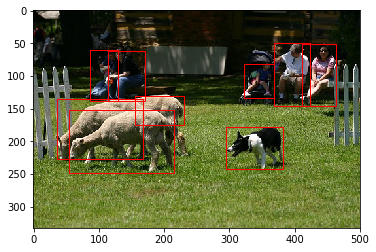

In [8]:
db = DetectionDB()
gt_bbox = db._parse_bbox_xml(xml_path)
draw_bounding_box(im, gt_bbox)

In [9]:
im_anchors = anchor.gen_im_anchors(f_w, f_w, stride=stride)
valid_anchors = anchor.remove_cross_boundary_anchors(im_w, im_h, im_anchors)
print('Number of all anchors: {}, after remove boundary cross anchors: {}'.format( 
      im_anchors.shape[0], valid_anchors.shape[0]))

Number of all anchors: 34596, after remove boundary cross anchors: 9474


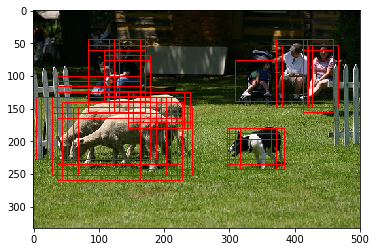

In [10]:
pos_box = anchor.get_gt_anchors(valid_anchors, gt_bbox, pos_thr=0.7, neg_thr=0.3)
draw_bounding_box(im, pos_box)